### NLP
### Assignment 1

### 1. Libraries

In [24]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import os # used for file manipulation
import sys # used for file manipulation
import re # used for regular expression
from urllib import request
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize


#### Helper custom fuctions


In [2]:
# Helper class to download and read the dataset
class Helper:
    def __init__(self, path, id_path):
        self.path = path
        self.id_path = id_path

    def download_dataset(self):
        # Download the dataset
        url = f"https://drive.google.com/uc?export=download&id={self.id_path}"
        request.urlretrieve(url, self.path)

    def read_dataset(self, path):
        # Read the dataset
        def read_lines(lines):
            is_header = True
            for line in lines:
                if is_header:
                    is_header = False
                    continue

                if not line or line.isspace():
                    is_header = True
                    continue

                label, comment = line.split(maxsplit=1)
                yield comment, int(label)

        with open(path, encoding='utf-8') as file:
            data = read_lines(file)
            df = pd.DataFrame.from_records(data, columns=["text", "label"])

        return df

#### Download the data from the following link and read the data from the file.

In [3]:
# Dowload the data from the source

helper = Helper(
    path='dataset',
    id_path='13XlJ4uhxxGprn6mnXwXNvV9PxSNyZCsY'
)

helper.download_dataset()
df = helper.read_dataset('dataset')
df.head()


,text,label
0,It's because Europeans do not want to change t...,0
1,The Muslims there do not want to assimilate pr...,0
2,But it's ok....because Europe will soon rebel ...,1
3,I forsee a big civil war in Europe in the futu...,0
4,"ISLAM – A Simple, Humanitarian and Attractive ...",0


### 2. Data Analysis

In [4]:
df['label'].value_counts()


label
0    27256
1     1387
Name: count, dtype: int64

In [5]:
# check for missing values

df.isnull().sum()

text     0
label    0
dtype: int64

In [6]:
# check for duplicate values
df.duplicated().sum()

352

In [7]:
df[df.duplicated()]

,text,label
29,"ISLAM – A Simple, Humanitarian and Attractive ...",0
30,WELCOME TO ISLAM..\n,0
31,AND PLEASE READ THE QURAN.\n,0
32,“Islam had the power of peacefully conquering ...,0
33,In contrast to Christianity which has been und...,0
...,...,...
28238,Denne kommentaren har fått for mange negative ...,0
28239,Denne kommentaren har fått for mange negative ...,0
28240,Denne kommentaren har fått for mange negative ...,0
28312,May jesus help us !\n,0


In [8]:
df.drop_duplicates(inplace = True)

In [9]:
# check for all the special characters
df['text'].str.extractall(r'([^a-zA-Z\s])')[0].value_counts()


0
.    26994
,    16147
'     6970
!     6028
?     3816
     ...  
►        1
υ        1
λ        1
ρ        1
ů        1
Name: count, Length: 257, dtype: int64

In [10]:
from collections import Counter
import matplotlib.pyplot as plt

# Count the number of words in each comment
df['word_count'] = df['text'].apply(lambda x: len(x.split()))

# Count the number of characters in each comment
df['char_count'] = df['text'].apply(lambda x: len(x))

# Count the number of special characters in each comment
df['special_char_count'] = df['text'].apply(lambda x: len([c for c in x if c in ('!','@','#','$','%','^','&','*','(',')','_','+','{','}','|',':','"','<','>','?','`','~',';',',','.','/','\\','[',']')]))

# Count the number of numerics in each comment
df['numerics_count'] = df['text'].apply(lambda x: len([c for c in x if c.isdigit()]))

# Count the number of uppercase words in each comment
df['upper_count'] = df['text'].apply(lambda x: len([c for c in x if c.isupper()]))

# Count the number of lowercase words in each comment
df['lower_count'] = df['text'].apply(lambda x: len([c for c in x if c.islower()]))

# Count the number of words in each comment
df['word_count'] = df['text'].apply(lambda x: len(x.split()))

# Count the number of stopwords in each comment
from nltk.corpus import stopwords
stop = stopwords.words('english')
df['stopwords_count'] = df['text'].apply(lambda x: len([c for c in x.split() if c in stop]))

# Count the number of unique words in each comment
df['unique_words_count'] = df['text'].apply(lambda x: len(set(x.split())))
df.head()



,text,label,word_count,char_count,special_char_count,numerics_count,upper_count,lower_count,stopwords_count,unique_words_count
0,It's because Europeans do not want to change t...,0,20,111,1,0,3,86,11,18
1,The Muslims there do not want to assimilate pr...,0,18,107,1,0,4,84,7,18
2,But it's ok....because Europe will soon rebel ...,1,24,132,6,0,3,98,14,21
3,I forsee a big civil war in Europe in the futu...,0,18,94,2,0,3,71,8,16
4,"ISLAM – A Simple, Humanitarian and Attractive ...",0,8,55,1,0,10,35,1,8


In [11]:
df.describe()

,label,word_count,char_count,special_char_count,numerics_count,upper_count,lower_count,stopwords_count,unique_words_count
count,28291.000000,28291.000000,28291.000000,28291.000000,28291.000000,28291.000000,28291.000000,28291.000000,28291.000000
mean,0.048036,14.081121,79.229720,2.244671,0.332650,4.904281,57.211657,5.586406,12.989467
std,0.213847,11.235597,63.678901,2.538821,1.495444,16.442933,49.849330,5.467813,9.223253
min,0.000000,1.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,7.000000,37.000000,1.000000,0.000000,1.000000,25.000000,2.000000,7.000000
50%,0.000000,11.000000,62.000000,1.000000,0.000000,1.000000,44.000000,4.000000,11.000000
75%,0.000000,18.000000,99.000000,3.000000,0.000000,3.000000,74.000000,8.000000,17.000000
max,1.000000,108.000000,507.000000,67.000000,88.000000,405.000000,412.000000,67.000000,83.000000


In [12]:
pd.set_option('display.max_colwidth', False)

df[df['special_char_count']==67]['text']

3347    Even You guys try to stop spreading islam in the world it wont workout anymore....islam is the most fastest growing religion in the world and it gives the peace for humanity......................­.......some shit guyz dont know anythng of the islam and they putting new policies to stop it spread,,,,,,,,,,,,,,,,, and they will realise about all the facts while he dies............Finally I say There are No God But AllAH and Muhommed (Peace be Upon Him ) is the last messenger of Allah...\n
Name: text, dtype: object

In [13]:
df[df['numerics_count']==88]['text']

3541    Genesis 12:1-3, Genesis 13:14-15,Genesis 15:18-21,Genesis 22:16-18, Genesis 17:7-8, Genesis 22:17,Genesis 24:60, Genesis 28:13-14.Genesis 35:11-12, Romans 4:13,Galatians 3:28-29,Galatians 3:16, 1 Kings 4:20-34, II Chronicles 1:15,Deuteronomy 20:16-18, Joshua 11:12, Joshua 13:1-6, Judges 1:27-36, Judges 1:35\n
Name: text, dtype: object

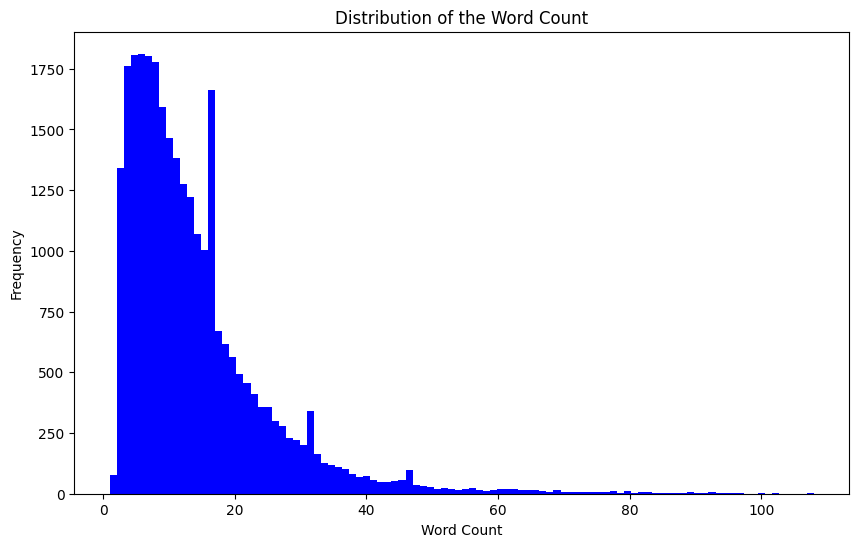

In [14]:
# Plot the distribution of the word count

plt.figure(figsize=(10, 6))
plt.hist(df['word_count'], bins=100, color='blue')
plt.title('Distribution of the Word Count')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

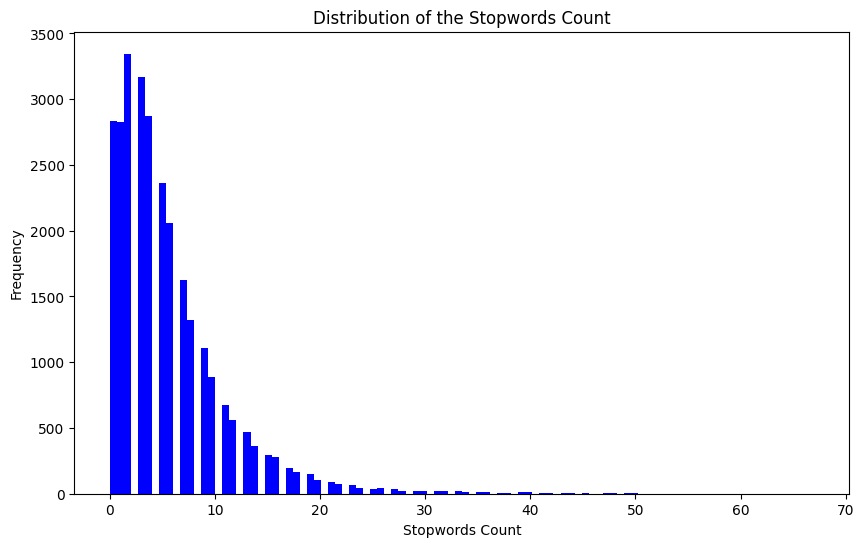

In [15]:
# Plot the distribution of the stopword count
plt.figure(figsize=(10, 6))
plt.hist(df['stopwords_count'], bins=100, color='blue')
plt.title('Distribution of the Stopwords Count')
plt.xlabel('Stopwords Count')
plt.ylabel('Frequency')
plt.show()

In [16]:
df['clean_text'] = df['text'].apply(lambda x: re.sub('\n','',x))


In [17]:
#removing unwanted characters.
# not using ,. because it might lead to joining to words if there is no space
df['clean_text'] = df['clean_text'].apply(lambda x: ''.join([y.lower() for y in x if y.isalpha() or y in " ,.'"]))


In [18]:
df['clean_text']

0        it's because europeans do not want to change their way of life and their customs and what makes them european.                     
1        the muslims there do not want to assimilate properly into european societies and even call for sharia law.                         
2        but it's ok....because europe will soon rebel against them, just like in spain and they will drive them out or they will be killed.
3        i forsee a big civil war in europe in the future, because the muslims will not leave quietly.                                      
4        islam  a simple, humanitarian and attractive religion                                                                              
                                 ...                                                                                                        
28638    yeah we are all monsters..i'm gonna kill u right now...                                                                            
28639    stup

In [19]:
#remove the . and , and make sure there is a space in between
df['clean_text'] = df['clean_text'].apply(lambda x: re.sub(r'[\,\.\']',' ',x))

In [20]:
df['clean_text']

0        it s because europeans do not want to change their way of life and their customs and what makes them european                      
1        the muslims there do not want to assimilate properly into european societies and even call for sharia law                          
2        but it s ok    because europe will soon rebel against them  just like in spain and they will drive them out or they will be killed 
3        i forsee a big civil war in europe in the future  because the muslims will not leave quietly                                       
4        islam  a simple  humanitarian and attractive religion                                                                              
                                 ...                                                                                                        
28638    yeah we are all monsters  i m gonna kill u right now                                                                               
28639    stup

In [21]:
df['clean_text'] = df['clean_text'].apply(lambda x: re.sub('\n','',x))

In [22]:
df['clean_text']

0        it s because europeans do not want to change their way of life and their customs and what makes them european                      
1        the muslims there do not want to assimilate properly into european societies and even call for sharia law                          
2        but it s ok    because europe will soon rebel against them  just like in spain and they will drive them out or they will be killed 
3        i forsee a big civil war in europe in the future  because the muslims will not leave quietly                                       
4        islam  a simple  humanitarian and attractive religion                                                                              
                                 ...                                                                                                        
28638    yeah we are all monsters  i m gonna kill u right now                                                                               
28639    stup

In [25]:
df['word_tokens']= df['clean_text'].apply(lambda x: word_tokenize(x))
df.head()

,text,label,word_count,char_count,special_char_count,numerics_count,upper_count,lower_count,stopwords_count,unique_words_count,clean_text,word_tokens
0,It's because Europeans do not want to change their way of life and their customs and what makes them European.\n,0,20,111,1,0,3,86,11,18,it s because europeans do not want to change their way of life and their customs and what makes them european,"[it, s, because, europeans, do, not, want, to, change, their, way, of, life, and, their, customs, and, what, makes, them, european]"
1,The Muslims there do not want to assimilate properly into European societies and even call for Sharia law.\n,0,18,107,1,0,4,84,7,18,the muslims there do not want to assimilate properly into european societies and even call for sharia law,"[the, muslims, there, do, not, want, to, assimilate, properly, into, european, societies, and, even, call, for, sharia, law]"
2,"But it's ok....because Europe will soon rebel against them, just like in Spain and they will drive them out or they will be killed.\n",1,24,132,6,0,3,98,14,21,but it s ok because europe will soon rebel against them just like in spain and they will drive them out or they will be killed,"[but, it, s, ok, because, europe, will, soon, rebel, against, them, just, like, in, spain, and, they, will, drive, them, out, or, they, will, be, killed]"
3,"I forsee a big civil war in Europe in the future, because the Muslims will not leave quietly.\n",0,18,94,2,0,3,71,8,16,i forsee a big civil war in europe in the future because the muslims will not leave quietly,"[i, forsee, a, big, civil, war, in, europe, in, the, future, because, the, muslims, will, not, leave, quietly]"
4,"ISLAM – A Simple, Humanitarian and Attractive Religion\n",0,8,55,1,0,10,35,1,8,islam a simple humanitarian and attractive religion,"[islam, a, simple, humanitarian, and, attractive, religion]"


In [62]:
#nltk stopwords modified to avoid deleting the negations
stopwords =['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each',
 'few',
 'more',
 'most',
 'other',
 'some',
 'such',
 'only',
 'own',
 'same',
 'so',
 'than',
 'too',
 'very',
 's',
 't',
 'can',
 'will',
 'just',
 'should',
 "should've",
 'now',
 'd',
 'll',
 'm',
 'o',
 're',
 've',
 'y',
 'ma','even','ur','u']


In [63]:
df['word_tokens']=df['word_tokens'].apply(lambda x:[y for y in x if y.lower() not in stopwords])

In [64]:
df.head()

,text,label,word_count,char_count,special_char_count,numerics_count,upper_count,lower_count,stopwords_count,unique_words_count,clean_text,word_tokens
0,It's because Europeans do not want to change their way of life and their customs and what makes them European.\n,0,20,111,1,0,3,86,11,18,it s because europeans do not want to change their way of life and their customs and what makes them european,"[european, not, want, change, way, life, custom, make, european]"
1,The Muslims there do not want to assimilate properly into European societies and even call for Sharia law.\n,0,18,107,1,0,4,84,7,18,the muslims there do not want to assimilate properly into european societies and even call for sharia law,"[muslim, not, want, assimilate, properly, european, society, call, sharia, law]"
2,"But it's ok....because Europe will soon rebel against them, just like in Spain and they will drive them out or they will be killed.\n",1,24,132,6,0,3,98,14,21,but it s ok because europe will soon rebel against them just like in spain and they will drive them out or they will be killed,"[ok, europe, soon, rebel, like, spain, drive, kill]"
3,"I forsee a big civil war in Europe in the future, because the Muslims will not leave quietly.\n",0,18,94,2,0,3,71,8,16,i forsee a big civil war in europe in the future because the muslims will not leave quietly,"[forsee, big, civil, war, europe, future, muslim, not, leave, quietly]"
4,"ISLAM – A Simple, Humanitarian and Attractive Religion\n",0,8,55,1,0,10,35,1,8,islam a simple humanitarian and attractive religion,"[islam, simple, humanitarian, attractive, religion]"


In [65]:
from nltk.stem import WordNetLemmatizer
lem = WordNetLemmatizer()
lem.lemmatize('dove',pos = 'v')

'dive'

In [66]:
df['word_tokens'] = df['word_tokens'].apply(lambda x: [lem.lemmatize(y,pos='v') for y in x])

In [67]:
df['word_tokens']

0        [european, not, want, change, way, life, custom, make, european]               
1        [muslim, not, want, assimilate, properly, european, society, call, sharia, law]
2        [ok, europe, soon, rebel, like, spain, drive, kill]                            
3        [forsee, big, civil, war, europe, future, muslim, not, leave, quietly]         
4        [islam, simple, humanitarian, attractive, religion]                            
                                ...                                                     
28638    [yeah, monster, gon, na, kill, right]                                          
28639    [stupid, brainwash, idiot]                                                     
28640    [ever, serbia, kosovo, fuck, idiot, don, know, shit]                           
28641    [probably, mean, monster, fucker, watchvvwrvmzjc]                              
28642    [fuck, funniest, thing, fuck, american, cunt, tell, someone, monster]          
Name: word_tokens, Le

In [111]:
data = df['word_tokens'].apply(lambda x: ' '.join(x))

In [112]:
clean_df = pd.DataFrame()

In [113]:
clean_df['text'] = data
clean_df['label'] =df['label']

In [114]:
clean_df

,text,label
0,european not want change way life custom make european,0
1,muslim not want assimilate properly european society call sharia law,0
2,ok europe soon rebel like spain drive kill,1
3,forsee big civil war europe future muslim not leave quietly,0
4,islam simple humanitarian attractive religion,0
...,...,...
28638,yeah monster gon na kill right,1
28639,stupid brainwash idiot,0
28640,ever serbia kosovo fuck idiot don know shit,0
28641,probably mean monster fucker watchvvwrvmzjc,0


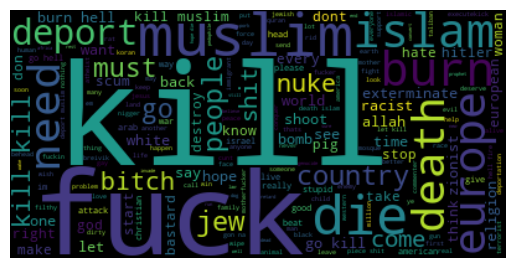

In [83]:
from wordcloud import WordCloud

toxic = clean_df[clean_df['label']==1]['text']
# Create and generate a word cloud image:
toxic_wordcloud = WordCloud().generate(' '.join(toxic))

# Display the generated image:
plt.imshow(toxic_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


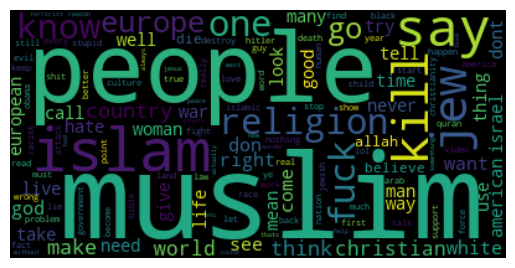

In [84]:
from wordcloud import WordCloud

non_toxic = clean_df[clean_df['label']==0]['text']
# Create and generate a word cloud image:
toxic_wordcloud = WordCloud().generate(' '.join(non_toxic))

# Display the generated image:
plt.imshow(toxic_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [86]:
wordcloud = WordCloud(background_color = 'white',
                      width = 1200,
                      height = 1000,
                      collocation_threshold = 3).generate(' '.join(non_toxic))


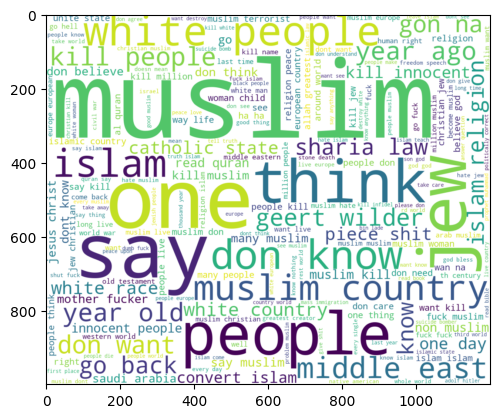

In [87]:
plt.imshow(wordcloud, interpolation='bilinear')


In [99]:
df.loc[df.text.str.contains('mother fucker')]

,text,label,word_count,char_count,special_char_count,numerics_count,upper_count,lower_count,stopwords_count,unique_words_count,clean_text,word_tokens
760,"my boyfriend will bury you next to Muhammad if you come to our country =) we will get you out of europe soon, Sorry hun, europe is for europeans =) Nationalism is growing rapidly, your the racist mother fucker, your against whire oreservation our land for our people, maybe we should kill every single muslim in the middle east and take your land?\n",1,63,348,8,0,3,272,29,49,my boyfriend will bury you next to muhammad if you come to our country we will get you out of europe soon sorry hun europe is for europeans nationalism is growing rapidly your the racist mother fucker your against whire oreservation our land for our people maybe we should kill every single muslim in the middle east and take your land,"[boyfriend, bury, next, muhammad, come, country, get, europe, soon, sorry, hun, europe, european, nationalism, grow, rapidly, racist, mother, fucker, whire, oreservation, land, people, maybe, kill, every, single, muslim, middle, east, take, land]"
6792,hey ediot don't call muslim is ediot mother fucker ayan hirsi iknow her she is abitch\n,0,16,86,0,0,0,69,5,14,hey ediot don t call muslim is ediot mother fucker ayan hirsi iknow her she is abitch,"[hey, ediot, don, call, muslim, ediot, mother, fucker, ayan, hirsi, iknow, abitch]"
8195,"you protect a freedom for a woman?, fuck you a woman and old and children is killing by your mother fucker army , averyday you kill innocent , what you do in afghanistan?\n",0,33,171,5,0,0,133,16,26,you protect a freedom for a woman fuck you a woman and old and children is killing by your mother fucker army averyday you kill innocent what you do in afghanistan,"[protect, freedom, woman, fuck, woman, old, child, kill, mother, fucker, army, averyday, kill, innocent, afghanistan]"
9516,fucking eurobia mother fucker were the fuck is atomic bomb fuckingggggggggggggggggg arabs muslim mother fucker come on europeans let's fuck up islam\n,1,22,149,0,0,0,126,5,19,fucking eurobia mother fucker were the fuck is atomic bomb fuckingggggggggggggggggg arabs muslim mother fucker come on europeans let s fuck up islam,"[fuck, eurobia, mother, fucker, fuck, atomic, bomb, fuckingggggggggggggggggg, arab, muslim, mother, fucker, come, european, let, fuck, islam]"
11801,Dude i get what you are saying but that is the wrong way too approach the problem of arab mother fuckers.\n,0,21,106,1,0,1,83,11,20,dude i get what you are saying but that is the wrong way too approach the problem of arab mother fuckers,"[dude, get, say, wrong, way, approach, problem, arab, mother, fucker]"
13342,"@Commenter#5524 If only few brave men like the one we saw stand up to these mother fucker stone throwers and hit them in the face with what ever in your hand then these dick heads mother fuckers wouldn't demonstrate anywhere; they would just pick up their trash belonging and go back to their shit hole country; I forgot, they don't even have a country, fucking gypsies.\n",0,66,372,7,4,3,289,29,57,commenter if only few brave men like the one we saw stand up to these mother fucker stone throwers and hit them in the face with what ever in your hand then these dick heads mother fuckers wouldn t demonstrate anywhere they would just pick up their trash belonging and go back to their shit hole country i forgot they don t even have a country fucking gypsies,"[commenter, brave, men, like, one, saw, stand, mother, fucker, stone, thrower, hit, face, ever, hand, dick, head, mother, fucker, wouldn, demonstrate, anywhere, would, pick, trash, belong, go, back, shit, hole, country, forget, don, country, fuck, gypsy]"
16764,i want the uploader to ban comments because non muslims who hate islam comes here and tell bad things like a mother fucker to fuck their parents\n,0,27,145,0,0,0,118,10,26,i want the uploader to ban comments because non muslims who hate islam comes here and tell bad things like a mother fuck

In [94]:
wordcloud1 = WordCloud(background_color = 'white',
                      width = 1200,
                      height = 1000,
                      collocation_threshold = 3).generate(' '.join(toxic))


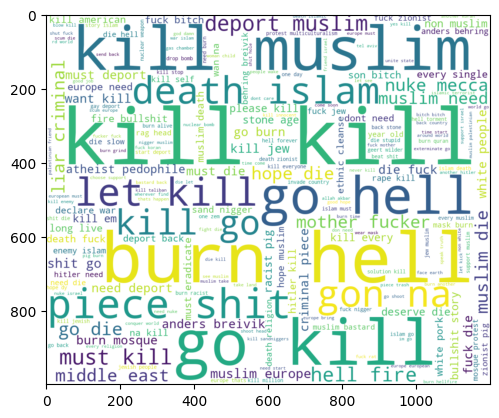

In [95]:
plt.imshow(wordcloud1, interpolation='bilinear')

In [93]:
[row for row in df.iterrows() if 'mother fucker' in row[1]]

[]

In [ ]:
# # Apply bag of words to the dataset

# from sklearn.feature_extraction.text import CountVectorizer
# cv = CountVectorizer()
# bag_of_words = cv.fit_transform(df['text']).toarray()


In [116]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_ = TfidfVectorizer(ngram_range=(1,3))
feature_matrix = tfidf_.fit_transform(clean_df['text'])
# tfidf_df = pd.DataFrame( feature_matrix.toarray(),columns = tfidf_.vocabulary)

In [122]:
tfidf_.get_feature_names_out()

array(['aaaaaaah', 'aaaaaaah last', 'aaaaaaah last judgment', ...,
       'ٱلڪتـب', 'ٱلڪتـب حتى', 'ٱلڪتـب حتى يعطوا'], dtype=object)

In [125]:
tfidf_.get_feature_names_out()[-50:]

array(['يد وهم', 'يد وهم صـغرون', 'يدينون', 'يدينون دين',
       'يدينون دين ٱلحق', 'يسمع', 'يسمع يتكلم', 'يسمع يتكلم اللغة',
       'يعطوا', 'يعطوا ٱلجزية', 'يعطوا ٱلجزية عن', 'يفهم', 'يفهم العالم',
       'يفهم العالم ما', 'يكون', 'يكون رجل', 'يكون رجل بدس', 'يمكن',
       'يمكن للمرء', 'يمكن للمرء أن', 'يهودية', 'يهودية قبل',
       'يهودية قبل أن', 'يوميا', 'يوميا للمسلم', 'يوميا للمسلم ممارسة',
       'ٱلأخر', 'ٱلأخر ولا', 'ٱلأخر ولا يحرمون', 'ٱلجزية', 'ٱلجزية عن',
       'ٱلجزية عن يد', 'ٱلحق', 'ٱلحق من', 'ٱلحق من ٱلذين', 'ٱلذكر',
       'ٱلذكر وٱلأنثى', 'ٱلذكر وٱلأنثى وأنه', 'ٱلذين', 'ٱلذين أوتوا',
       'ٱلذين أوتوا ٱلڪتـب', 'ٱلذين لا', 'ٱلذين لا يؤمنون', 'ٱلزوجين',
       'ٱلله', 'ٱلله ورسوله', 'ٱلله ورسوله ولا', 'ٱلڪتـب', 'ٱلڪتـب حتى',
       'ٱلڪتـب حتى يعطوا'], dtype=object)

In [105]:
# Concatenate the original DataFrame with the TF-IDF DataFrame
clean_df  = pd.concat([clean_df, tfidf_df], axis=1)

In [106]:
clean_df.head()

,text,label,0,1,2,3,4,5,6,7,...,23259,23260,23261,23262,23263,23264,23265,23266,23267,23268
0,european not want change way life custom make european,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,muslim not want assimilate properly european society call sharia law,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ok europe soon rebel like spain drive kill,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,forsee big civil war europe future muslim not leave quietly,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,islam simple humanitarian attractive religion,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# feature_names = cv.get_feature_names_out()
# pd.DataFrame(bag_of_words, columns = feature_names)

### Perform Clean up and data analysis